# Yield Curve Analysis - Principle Component Analysis (PCA)

The purpose of this analysis is to perform dimensionality reduction using Principle Component Analysis (PCA) on a yield curve data set. The data describes the yield rates at each maturity for several years, from 2006 to 2020.

In [1]:
import pandas as pd

# read the data
df_raw = pd.read_csv('yield_rates_2006_and_2021.csv')

# display dimensions
print("Number of rows: ", df_raw.shape[0])
print("Number of columns: ", df_raw.shape[1])

# display first 10 rows
display(df_raw.iloc[:10,])

# create list of column names
print("\nColumns:")
colnames = df_raw.columns
print(colnames)

Number of rows:  3854
Number of columns:  13


,Date,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
0,01/03/06,4.05,NaN,4.16,4.40,4.38,4.34,4.30,4.30,4.32,4.37,4.62,NaN
1,01/04/06,4.03,NaN,4.19,4.37,4.35,4.31,4.28,4.28,4.31,4.36,4.60,NaN
2,01/05/06,4.05,NaN,4.20,4.37,4.36,4.32,4.29,4.29,4.31,4.36,4.61,NaN
3,01/06/06,4.06,NaN,4.22,4.39,4.38,4.36,4.32,4.32,4.33,4.38,4.63,NaN
4,01/09/06,4.09,NaN,4.23,4.40,4.39,4.36,4.32,4.32,4.34,4.38,4.63,NaN
5,01/10/06,4.15,NaN,4.29,4.42,4.42,4.41,4.36,4.36,4.38,4.43,4.68,NaN
6,01/11/06,4.16,NaN,4.30,4.45,4.44,4.44,4.39,4.39,4.41,4.46,4.70,NaN
7,01/12/06,4.16,NaN,4.32,4.43,4.42,4.39,4.35,4.35,4.37,4.42,4.66,NaN
8,01/13/06,4.13,NaN,4.33,4.43,4.40,4.34,4.29,4.28,4.30,4.36,4.59,NaN
9,01/17/06,4.11,NaN,4.38,4.47,4.42,4.33,4.28,4.27,4.29,4.34,4.57,NaN



Columns:
Index(['Date', '1 mo', '2 mo', '3 mo', '6 mo', '1 yr', '2 yr', '3 yr', '5 yr',
       '7 yr', '10 yr', '20 yr', '30 yr'],
      dtype='object')


## Understand and Handle Missing Data

In [2]:
# check for missing values
for col in colnames:
  print("Variable ",col," includes ", df_raw[col].isna().sum(), " NaN entries")

Variable  Date  includes  0  NaN entries
Variable  1 mo  includes  1  NaN entries
Variable  2 mo  includes  3204  NaN entries
Variable  3 mo  includes  4  NaN entries
Variable  6 mo  includes  1  NaN entries
Variable  1 yr  includes  1  NaN entries
Variable  2 yr  includes  1  NaN entries
Variable  3 yr  includes  1  NaN entries
Variable  5 yr  includes  1  NaN entries
Variable  7 yr  includes  1  NaN entries
Variable  10 yr  includes  1  NaN entries
Variable  20 yr  includes  1  NaN entries
Variable  30 yr  includes  27  NaN entries


In [3]:
# print missing ratio
for col in colnames:
  print("Variable ",col," is missing ", round(df_raw[col].isna().sum()/len(df_raw)*100,2), " % of entries")

Variable  Date  is missing  0.0  % of entries
Variable  1 mo  is missing  0.03  % of entries
Variable  2 mo  is missing  83.13  % of entries
Variable  3 mo  is missing  0.1  % of entries
Variable  6 mo  is missing  0.03  % of entries
Variable  1 yr  is missing  0.03  % of entries
Variable  2 yr  is missing  0.03  % of entries
Variable  3 yr  is missing  0.03  % of entries
Variable  5 yr  is missing  0.03  % of entries
Variable  7 yr  is missing  0.03  % of entries
Variable  10 yr  is missing  0.03  % of entries
Variable  20 yr  is missing  0.03  % of entries
Variable  30 yr  is missing  0.7  % of entries


In [4]:
# remove '2mo' column since more than 80% of entries are missing
df2 = df_raw.drop(['2 mo'], axis=1, inplace=False)
print(df2.shape)

(3854, 12)


In [5]:
# drop any rows which contain NULL values
df3 = df2.dropna(inplace=False)

# confirm no null values remain
df3.isna().sum()

Date     0
1 mo     0
3 mo     0
6 mo     0
1 yr     0
2 yr     0
3 yr     0
5 yr     0
7 yr     0
10 yr    0
20 yr    0
30 yr    0
dtype: int64

In [6]:
# ignore warnings in the notebook
import warnings
warnings.filterwarnings('ignore')

# change date variable to a datetime variable type
date = pd.to_datetime(df3.iloc[:,0], infer_datetime_format=True)

# assign back to dataframe
df3['Date'] = date

# create new dataframe with Date as the index
df = df3.set_index('Date')
m = df.shape[0]
n = df.shape[1]

# print new dimensions
print('Number of rows: ', m)
print('Number of columns: ', n)

# override colnames list with new column names
colnames = df.columns

Number of rows:  3824
Number of columns:  11


## Exploratory Data Analysis

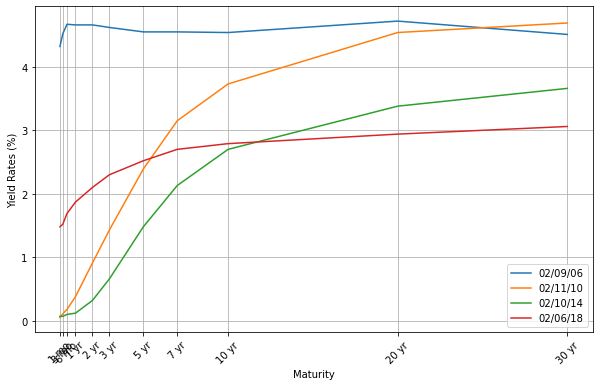

In [7]:
import matplotlib.pyplot as plt

# create intervals for the yield maturities
interval = [1/12, 3/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30]

# define dates for sample yield curves
curves = ['02/09/06', '02/11/10', '02/10/14', '02/06/18']

# plot the 4 yield curves
fig = plt.figure(figsize=(10, 6))

for curve in curves:
  plt.plot(interval, df.loc[curve], label=curve)

plt.xticks(interval, df.columns, rotation=45)
plt.legend(loc='lower right')
plt.xlabel('Maturity')
plt.ylabel('Yield Rates (%)')
plt.grid()
plt.show()

## Initial Observations

As shown in the line chart above, the yield curve may take a different shape, depending on economic factors. The curves from February 2006 and 2018 are flatter curves, meaning the yield rate is almost the same, no matter the maturity, whereas the curves from February 2010 and 2014 are sloped, where the yield rate is higher for longer term maturities.

## Principle Component Analysis

Begin by standardizing the data set, so all numeric variables are represented on the same scale. Then comput the covariance matrix, eigenvalues, and eigenvectors to determine the principle components and their respective variance.

In [8]:
from sklearn.preprocessing import StandardScaler

# standardize the numeric variables 
sc = StandardScaler()
df = pd.DataFrame(sc.fit_transform(df), columns=colnames)

# verify the data frame
df.head()

,1 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
0,2.130823,2.210605,2.217039,2.229810,2.300287,2.268443,2.100971,1.943919,1.707859,1.400748,1.155415
1,2.156805,2.217039,2.236089,2.255988,2.321604,2.306207,2.134321,1.979783,1.754466,1.438144,1.196833
2,2.169796,2.229908,2.242439,2.255988,2.314498,2.298654,2.125983,1.970817,1.745144,1.438144,1.207188
3,2.195779,2.229908,2.248788,2.262533,2.321604,2.313760,2.150996,1.997714,1.782430,1.475539,1.248606
4,2.176292,2.229908,2.236089,2.255988,2.335815,2.313760,2.142658,1.988749,1.773108,1.456841,1.227897


In [9]:
# compute the covariance matrix
cov = pd.DataFrame.cov(df)
print('Covariance matrix:\n', round(cov, 2))

Covariance matrix:
        1 mo  3 mo  6 mo  1 yr  2 yr  3 yr  5 yr  7 yr  10 yr  20 yr  30 yr
1 mo   1.00  1.00  0.99  0.99  0.97  0.95  0.87  0.79   0.70   0.55   0.50
3 mo   1.00  1.00  1.00  0.99  0.98  0.95  0.88  0.80   0.71   0.56   0.50
6 mo   0.99  1.00  1.00  1.00  0.99  0.96  0.90  0.81   0.72   0.57   0.51
1 yr   0.99  0.99  1.00  1.00  0.99  0.97  0.91  0.83   0.74   0.59   0.53
2 yr   0.97  0.98  0.99  0.99  1.00  0.99  0.95  0.88   0.79   0.64   0.58
3 yr   0.95  0.95  0.96  0.97  0.99  1.00  0.98  0.92   0.84   0.71   0.65
5 yr   0.87  0.88  0.90  0.91  0.95  0.98  1.00  0.98   0.93   0.83   0.78
7 yr   0.79  0.80  0.81  0.83  0.88  0.92  0.98  1.00   0.98   0.91   0.88
10 yr  0.70  0.71  0.72  0.74  0.79  0.84  0.93  0.98   1.00   0.97   0.95
20 yr  0.55  0.56  0.57  0.59  0.64  0.71  0.83  0.91   0.97   1.00   0.99
30 yr  0.50  0.50  0.51  0.53  0.58  0.65  0.78  0.88   0.95   0.99   1.00


In [10]:
from numpy import linalg as LA

# compute the Eigenvalues and Eigenvectors
eval, evec = LA.eig(cov)

# define function to round a list to 2 decimal points
def round_list(l):
  rounded = []
  for li in l:
    rounded.append(round(li, 2))
  return rounded

# starting point for cumulative variance
cmv = 0

# store variances in a list
variances = []

# display the Principle Components
for i in range(len(eval)):
  pc = round_list(list(evec[i]))
  v = round(eval[i], 2)
  variances.append(v)
  pv = round(eval[i]/sum(eval) * 100, 1)
  cmv += pv
  print('The PC ', i + 1, ' is ', pc, ', its variance is ', v, ', % variance is ', pv, '%, and % cumulative variance is ', round(cmv, 2), '%\n')

The PC  1  is  [-0.3, 0.29, -0.39, 0.54, -0.05, -0.41, -0.42, 0.17, -0.06, 0.04, 0.02] , its variance is  9.38 , % variance is  85.3 %, and % cumulative variance is  85.3 %

The PC  2  is  [-0.3, 0.29, -0.31, 0.2, -0.02, 0.15, 0.56, -0.48, 0.21, -0.25, -0.1] , its variance is  1.5 , % variance is  13.6 %, and % cumulative variance is  98.9 %

The PC  3  is  [-0.31, 0.27, -0.21, -0.19, -0.08, 0.43, 0.16, 0.24, -0.47, 0.43, 0.28] , its variance is  0.1 , % variance is  0.9 %, and % cumulative variance is  99.8 %

The PC  4  is  [-0.31, 0.26, -0.06, -0.42, -0.01, 0.28, -0.33, 0.3, 0.57, -0.18, -0.18] , its variance is  0.01 , % variance is  0.1 %, and % cumulative variance is  99.9 %

The PC  5  is  [-0.32, 0.19, 0.19, -0.4, 0.18, -0.28, -0.13, -0.23, -0.54, -0.33, -0.3] , its variance is  0.01 , % variance is  0.1 %, and % cumulative variance is  100.0 %

The PC  6  is  [-0.32, 0.12, 0.36, -0.15, 0.14, -0.45, 0.16, -0.16, 0.33, 0.55, 0.19] , its variance is  0.0 , % variance is  0.0 %, a

## Visualize Principle Components

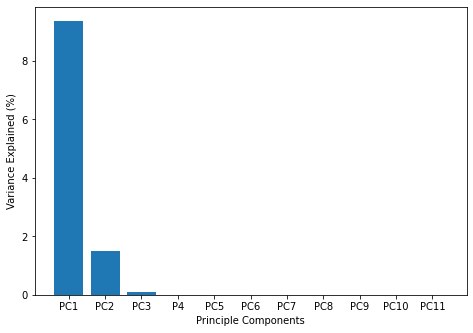

In [11]:
# create bar plot
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
principle_components = ['PC1', 'PC2', 'PC3', 'P4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11',]

# create bar chart
ax.bar(principle_components, variances)
plt.xlabel('Principle Components')
plt.ylabel('Variance Explained (%)')
plt.show()

## Observation

As shown in the bar chart above, the transformed PC1 and PC2 variables represent almost all of the variance in the original data set.

## Visualize Trend of Standardized Yield Rates

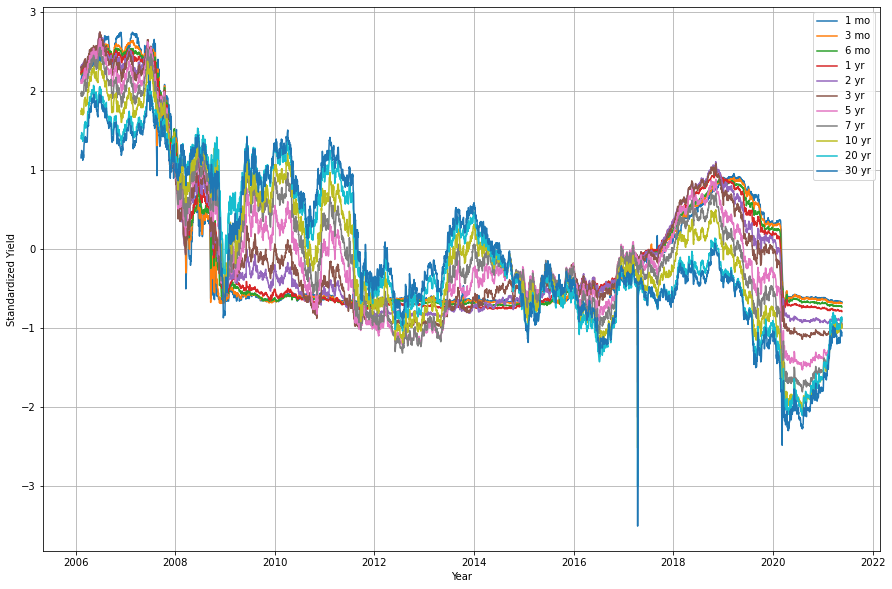

In [12]:
# plot the yearly yield trend for all maturity time intervals
fig = plt.figure(figsize=(15, 10))

# generate line
for c in colnames:
  plt.plot(date, df[c], label=c)

plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Standardized Yield')
plt.grid()
plt.show()

## Visualize Trend of Transformed Data Over Time

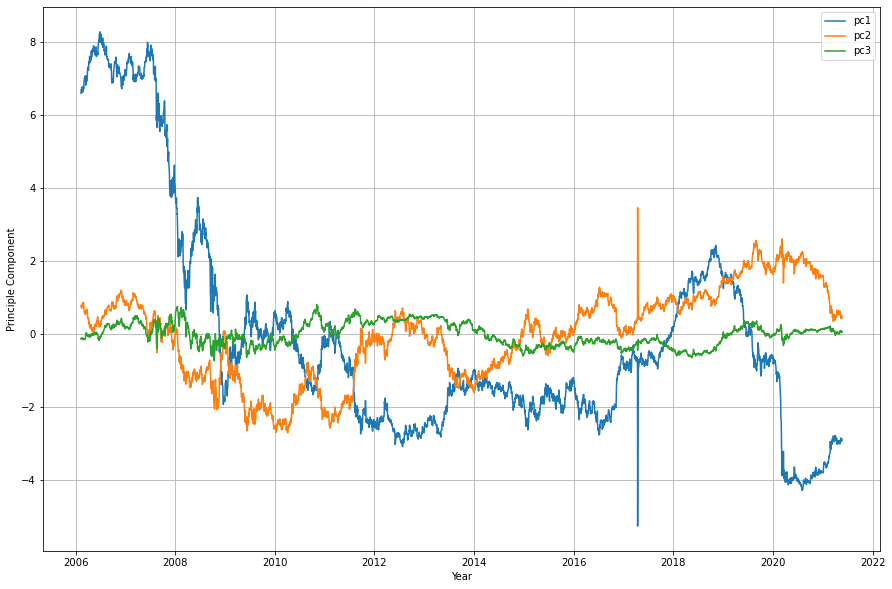

In [13]:
from sklearn.decomposition import PCA

# perform PCA
pca = PCA(n_components=3)
t_df = pca.fit_transform(df)

# store the PCA components
pc1 = t_df[:,0]
pc2 = t_df[:,1]
pc3 = t_df[:,2]

# plot the 3 principle components over time
fig = plt.figure(figsize=(15, 10))

# generate lines
plt.plot(date, pc1, label='pc1')
plt.plot(date, pc2, label='pc2')
plt.plot(date, pc3, label='pc3')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Principle Component')
plt.grid()
plt.show()

In [14]:
import numpy as np

# perform PCA
pca_df = pca.fit(df)

# cumulative sum of explained variance
cs = np.cumsum(pca_df.explained_variance_ratio_)

# display information for each component
for i in range(len(pca_df.components_)):
  rounded_components = round_list(list(pca_df.components_[i]))
  rounded_explained_variance = round(pca_df.explained_variance_[i], 2)
  rounded_ratio = round(pca_df.explained_variance_ratio_[i] * 100, 2)
  cmsm = round(cs[i] * 100, 2)
  print('Components: ', rounded_components, ', explained variance: ', rounded_explained_variance, ', proportion of explained variance: ', rounded_ratio, '%, cumulative proportion: ', cmsm, '%')


Components:  [0.3, 0.3, 0.31, 0.31, 0.32, 0.32, 0.32, 0.31, 0.3, 0.26, 0.25] , explained variance:  9.38 , proportion of explained variance:  85.27 %, cumulative proportion:  85.27 %
Components:  [0.29, 0.29, 0.27, 0.26, 0.19, 0.12, -0.06, -0.2, -0.33, -0.47, -0.52] , explained variance:  1.5 , proportion of explained variance:  13.64 %, cumulative proportion:  98.91 %
Components:  [0.39, 0.31, 0.21, 0.06, -0.19, -0.36, -0.44, -0.36, -0.08, 0.25, 0.38] , explained variance:  0.1 , proportion of explained variance:  0.88 %, cumulative proportion:  99.79 %


## Understand Relationship Between Principle Components and Original Data

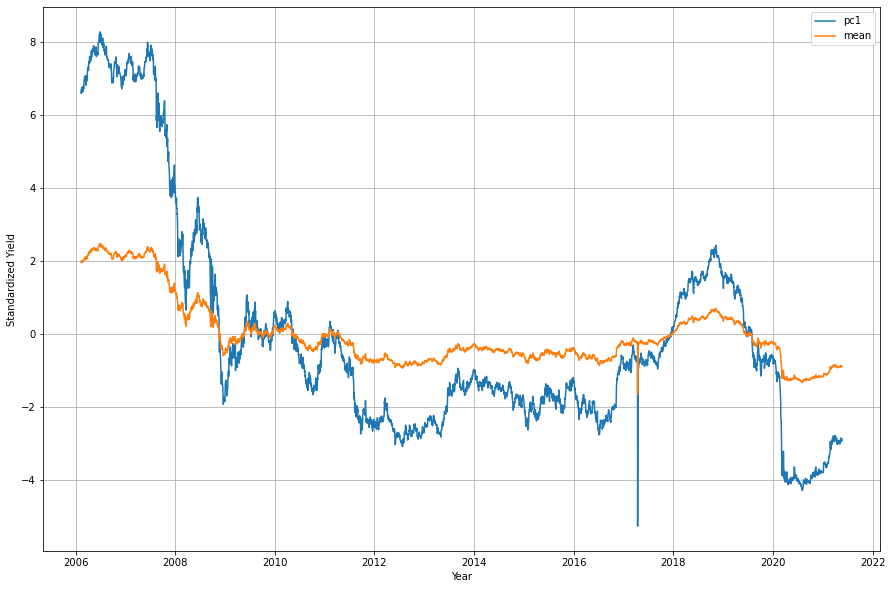

In [15]:
# compute mean for each row
mean = df.mean(axis=1)

# plot time series of mean yield values for each date and PC1
fig = plt.figure(figsize=(15, 10))

# generate lines
plt.plot(date, pc1, label='pc1')
plt.plot(date, mean, label='mean')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Standardized Yield')
plt.grid()
plt.show()

In [16]:
from scipy.stats import pearsonr

# compute correlation between the mean yield and PC1
correlation, p_val = pearsonr(pc1, mean)
print("Pearson's correlation between PC1 and mean: ", round(correlation, 5))

# interpretation of correlation: the correlation value of 0.99 means that there is extremely high positive correlation between PC1 and the mean yield rates
# as the mean yield rate increases, so does PC1, and vice versa

Pearson's correlation between PC1 and mean:  0.99977


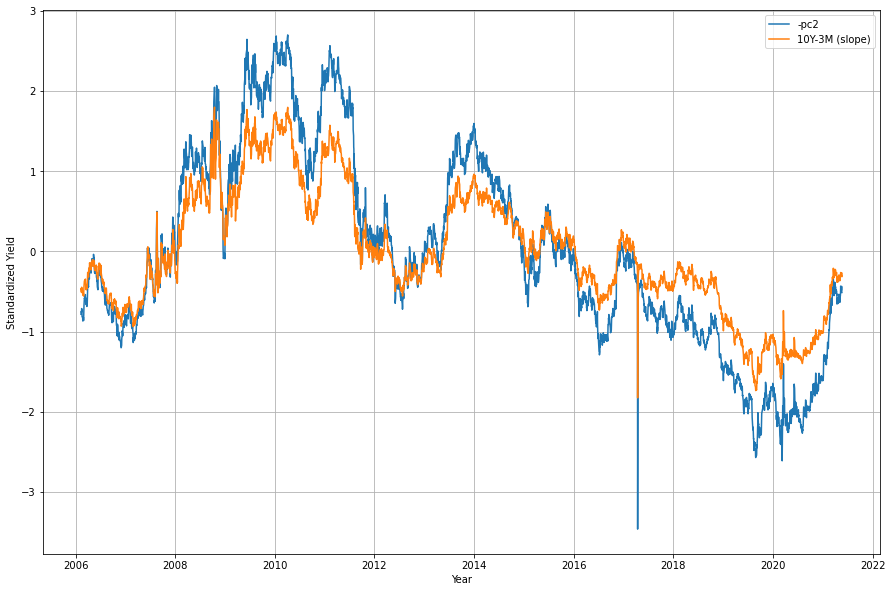

In [17]:
# compute difference between 3 month and 10 year yield rates
slope = df['10 yr'] - df['3 mo']

# plot time series of slope for each date and a negative version of PC2
fig = plt.figure(figsize=(15, 10))

# generate lines
plt.plot(date, -pc2, label='-pc2')
plt.plot(date, slope, label='10Y-3M (slope)')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Standardized Yield')
plt.grid()
plt.show()

In [18]:
# compute correlation between the slope and PC2
corr, p = pearsonr(pc2, slope)
print("Pearson's correlation between PC2 and slope: ", round(corr, 5))

# interpretation of correlation: the correlation value of -0.98 means that there is extremely high negative correlation between PC2 and the yield curve slope
# as the yield curve slope increases, PC2 decreases (and vice versa)

Pearson's correlation between PC2 and slope:  -0.9859
